# 导入数据，初步探索

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
train = pd.read_csv('./drive/MyDrive/final-ml/train_final.csv')
test = pd.read_csv('./drive/MyDrive/final-ml/test_final.csv')

In [2]:
def reduce_mem_usage(df):
    '''
    遍历DataFrame的所有列并修改它们的数据类型以减少内存使用
    :param df: 需要处理的数据集
    :return:
    '''
    start_mem = df.memory_usage().sum() / 1024 ** 2  # 记录原数据的内存大小
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:  # 这里只过滤了object格式，如果代码中还包含其他类型，要一并过滤
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':  # 如果是int类型的话,不管是int64还是int32,都加入判断
                # 依次尝试转化成in8,in16,in32,in64类型,如果数据大小没溢出,那么转化
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:  # 不是整形的话,那就是浮点型
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:  # 如果不是数值型的话,转化成category类型
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2    # 看一下转化后的数据的内存大小
    print('Memory usage after optimization is {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))  # 看一下压缩比例
    return df

In [3]:
train_data = reduce_mem_usage(train)
test_data = reduce_mem_usage(test)

Memory usage of dataframe is 55.69 MB
Memory usage after optimization is 8.11 MB
Decreased by 85.4%
Memory usage of dataframe is 55.69 MB
Memory usage after optimization is 8.11 MB
Decreased by 85.4%


In [4]:
del train, test
import gc
gc.collect()

103

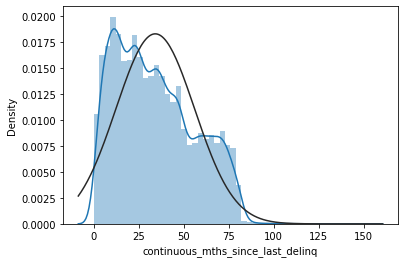

In [80]:
sns.distplot(train.continuous_mths_since_last_delinq, fit = stats.norm)

In [82]:
train.addr_state

AttributeError: ignored

In [70]:
for name in train.columns:
  if 'continuous' in name:
    print(name)

continuous_annual_inc
continuous_annual_inc_joint
continuous_delinq_2yrs
continuous_dti
continuous_dti_joint
continuous_fico_range_high
continuous_fico_range_low
continuous_funded_amnt
continuous_funded_amnt_inv
continuous_inq_last_6mths
continuous_installment
continuous_int_rate
continuous_last_fico_range_high
continuous_last_fico_range_low
continuous_loan_amnt
continuous_mths_since_last_delinq
continuous_mths_since_last_major_derog
continuous_mths_since_last_record
continuous_open_acc
continuous_pub_rec


In [71]:
for name in train.columns:
  if 'discrete' in name:
    print(name)

discrete_addr_state_1_one_hot
discrete_addr_state_2_one_hot
discrete_addr_state_3_one_hot
discrete_addr_state_4_one_hot
discrete_addr_state_5_one_hot
discrete_addr_state_6_one_hot
discrete_addr_state_7_one_hot
discrete_addr_state_8_one_hot
discrete_addr_state_9_one_hot
discrete_addr_state_10_one_hot
discrete_addr_state_11_one_hot
discrete_addr_state_12_one_hot
discrete_addr_state_13_one_hot
discrete_addr_state_14_one_hot
discrete_addr_state_15_one_hot
discrete_addr_state_16_one_hot
discrete_addr_state_17_one_hot
discrete_addr_state_18_one_hot
discrete_addr_state_19_one_hot
discrete_addr_state_20_one_hot
discrete_addr_state_21_one_hot
discrete_addr_state_22_one_hot
discrete_addr_state_23_one_hot
discrete_addr_state_24_one_hot
discrete_addr_state_25_one_hot
discrete_addr_state_26_one_hot
discrete_addr_state_27_one_hot
discrete_addr_state_28_one_hot
discrete_addr_state_29_one_hot
discrete_addr_state_30_one_hot
discrete_addr_state_31_one_hot
discrete_addr_state_32_one_hot
discrete_addr_sta

In [67]:
train.columns

Index(['continuous_annual_inc', 'continuous_annual_inc_joint',
       'continuous_delinq_2yrs', 'continuous_dti', 'continuous_dti_joint',
       'continuous_fico_range_high', 'continuous_fico_range_low',
       'continuous_funded_amnt', 'continuous_funded_amnt_inv',
       'continuous_inq_last_6mths',
       ...
       'discrete_sub_grade_28_one_hot', 'discrete_sub_grade_29_one_hot',
       'discrete_sub_grade_30_one_hot', 'discrete_sub_grade_31_one_hot',
       'discrete_sub_grade_32_one_hot', 'discrete_sub_grade_33_one_hot',
       'discrete_sub_grade_34_one_hot', 'discrete_sub_grade_35_one_hot',
       'discrete_term_1_one_hot', 'discrete_term_2_one_hot'],
      dtype='object', length=146)

In [62]:
train.loc[:, ['continuous_funded_amnt', 'continuous_funded_amnt_inv','continuous_pub_rec']]

,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_pub_rec
0,3600.0,3600.0,0.0
1,24700.0,24700.0,0.0
2,20000.0,20000.0,0.0
3,10400.0,10400.0,0.0
4,11950.0,11950.0,0.0
...,...,...,...
49995,16000.0,16000.0,0.0
49996,8500.0,8500.0,0.0
49997,20050.0,20050.0,0.0
49998,35000.0,35000.0,0.0


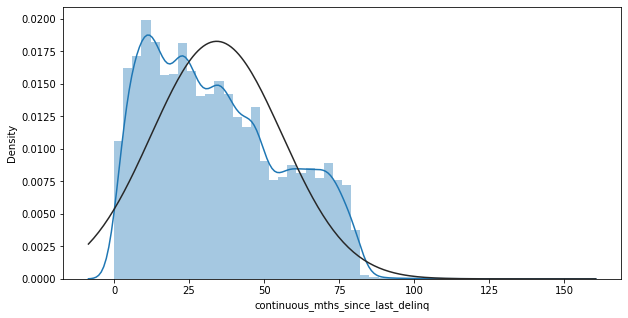

In [ ]:
# 查看自上次拖欠依赖的月数 mths_since_last_delinq
plt.figure(figsize = (10,5))
# ax = plt.subplot(1,2,1)
sns.distplot(train.continuous_mths_since_last_delinq, fit = stats.norm)


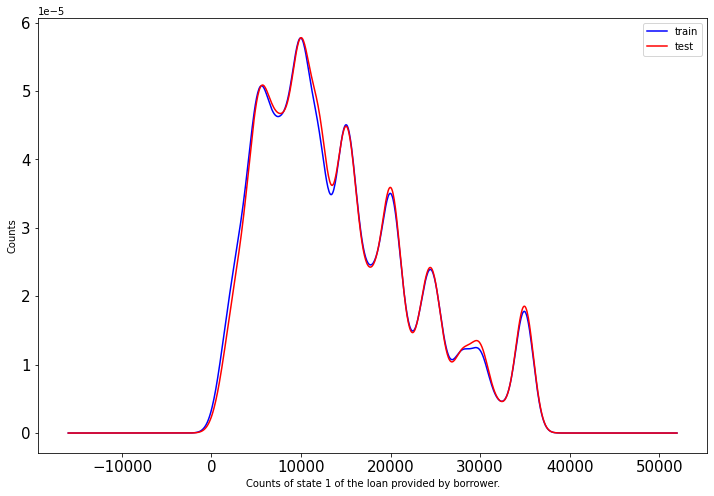

In [ ]:
# plt.subplot(1,2,1)
ax = train.continuous_funded_amnt.plot(kind = 'density',
     figsize = (12,8),fontsize=15,rot = 0, color = 'blue')
# plt.subplot(1,2,2)
ax = test.continuous_funded_amnt.plot(kind = 'density',
     figsize = (12,8),fontsize=15,rot = 0, color='red')
ax.set_xlabel('Counts of state 1 of the loan provided by borrower.')
ax.set_ylabel('Counts')
ax = ax.legend(['train', 'test'])

Text(0, 0.5, 'Months since last delinquency')

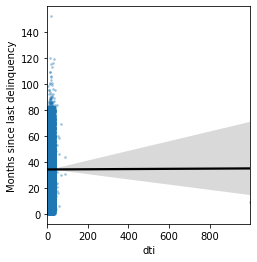

In [ ]:
# 检查mths_since_last_delinq与dti是否存在线性关系
plt.figure(figsize = (8, 4))
ax = plt.subplot(1,2,1)
sns.regplot(x='continuous_dti',y='continuous_mths_since_last_delinq',data=train[['continuous_dti', 'continuous_mths_since_last_delinq']], 
            ax=ax, scatter_kws = {
                'marker': '.',
                's': 3,
                'alpha': 0.3
            }, line_kws = {'color': 'k'})
plt.xlabel('dti')
plt.ylabel('Months since last delinquency')

In [ ]:
train.columns

Index(['continuous_annual_inc', 'continuous_annual_inc_joint',
       'continuous_delinq_2yrs', 'continuous_dti', 'continuous_dti_joint',
       'continuous_fico_range_high', 'continuous_fico_range_low',
       'continuous_funded_amnt', 'continuous_funded_amnt_inv',
       'continuous_inq_last_6mths',
       ...
       'discrete_sub_grade_28_one_hot', 'discrete_sub_grade_29_one_hot',
       'discrete_sub_grade_30_one_hot', 'discrete_sub_grade_31_one_hot',
       'discrete_sub_grade_32_one_hot', 'discrete_sub_grade_33_one_hot',
       'discrete_sub_grade_34_one_hot', 'discrete_sub_grade_35_one_hot',
       'discrete_term_1_one_hot', 'discrete_term_2_one_hot'],
      dtype='object', length=146)

# 使用原始特征构建模型

## 分割训练集和测试集

In [9]:
TRAIN_IDX=train.shape[0]
TEST_IDX=TRAIN_IDX + test.shape[0]

In [10]:
x=pd.concat([train, test], axis = 0)
y=pd.DataFrame(x.loc[:, 'loan_status'], columns=['loan_status'])
del x['loan_status']

In [11]:
data = pd.concat([x, y], axis = 1)
train_data = data.iloc[:TRAIN_IDX, :]
test_data = data.iloc[TRAIN_IDX: TEST_IDX, :]
import lightgbm as lgb
train_dataset = lgb.Dataset(train_data.drop(columns='loan_status'), train_data['loan_status'])
test_dataset = lgb.Dataset(test_data.drop(columns='loan_status'), test_data['loan_status'])


## 构建LGB模型, 用训练集训练模型

### 调参

In [5]:
import io
import multiprocessing
from contextlib import redirect_stdout
from copy import deepcopy
from dataclasses import dataclass, asdict
import hyperopt.pyll
from hyperopt import fmin, tpe, hp
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import torch

import copy
cpu_count = 1
use_gpu = False
@dataclass
class LGBOpt:
    num_threads: any = hp.choice('num_threads', [cpu_count])
    num_leaves: any = hp.choice('num_leaves', [64])
    metric: any = hp.choice('metric', ['binary_error'])
    num_round: any = hp.choice('num_rounds', [1000])
    objective: any = hp.choice('objective', ['binary'])
    learning_rate: any = hp.uniform('learning_rate', 0.01, 0.1)
    feature_fraction: any = hp.uniform('feature_fraction', 0.5, 1.0)
    bagging_fraction: any = hp.uniform('bagging_fraction', 0.8, 1.0)
    device_type: any = hp.choice('device_tpye', ['gpu']) if use_gpu else hp.choice('device_type',
                                                                                   ['cpu'])
    boosting: any = hp.choice('boosting', ['gbdt', 'dart', 'goss'])
    extra_trees: any = hp.choice('extra_tress', [False, True])
    drop_rate: any = hp.uniform('drop_rate', 0, 0.2)
    uniform_drop: any = hp.choice('uniform_drop', [True, False])
    lambda_l1: any = hp.uniform('lambda_l1', 0, 10)  # TODO: Check range
    lambda_l2: any = hp.uniform('lambda_l2', 0, 10)  # TODO: Check range
    min_gain_to_split: any = hp.uniform('min_gain_to_split', 0, 1)  # TODO: Check range
    min_data_in_bin = hp.choice('min_data_in_bin', [3, 5, 10, 15, 20, 50])

    @staticmethod
    def get_common_params():
        return {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
    

In [6]:
class FitterBase(object):
    def __init__(self, label, metric, max_eval=100, opt=None):
        self.label = label
        self.metric = metric
        self.opt_params = dict()
        self.max_eval = max_eval
        self.opt = opt

    def get_loss(self, y, y_pred):
        if self.metric == 'error':
            return 1 - accuracy_score(y, y_pred)
        elif self.metric == 'precision':
            return 1 - precision_score(y, y_pred)
        elif self.metric == 'recall':
            return 1 - recall_score(y, y_pred)
        elif self.metric == 'macro_f1':
            return 1 - f1_score(y, y_pred, average='macro')
        elif self.metric == 'micro_f1':
            return 1 - f1_score(y, y_pred, average='micro')
        elif self.metric == 'auc':  # TODO: Add a warning checking if y_predict is all [0, 1], it should be probability
            return 1 - roc_auc_score(y, y_pred)
        else:
            raise Exception("Not implemented yet.")

In [7]:
class LGBFitter(FitterBase):
    def __init__(self, label='label', metric='error', opt: LGBOpt = None, max_eval=100):
        super(LGBFitter, self).__init__(label, metric, max_eval)
        if opt is not None:
            self.opt = opt
        else:
            self.opt = LGBOpt()
        self.best_round = None
        self.clf = None

    def train(self, train_df, eval_df, params=None, use_best_eval=True):
        self.best_round = None
        dtrain = lgb.Dataset(train_df.drop(columns=[self.label]), train_df[self.label])
        deval = lgb.Dataset(eval_df.drop(columns=[self.label]), eval_df[self.label])
        evallist = [dtrain, deval]
        if params is None:
            use_params = deepcopy(self.opt_params)
        else:
            use_params = deepcopy(params)

        num_round = use_params.pop('num_round')
        if use_best_eval:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            min_error = np.inf
            min_index = 0
            for idx in range(len(output) - 1):
                if len(output[idx].split("\t")) == 3:
                    temp = float(output[idx].split("\t")[2].split(":")[1])
                    if min_error > temp:
                        min_error = temp
                        min_index = int(output[idx].split("\t")[0][1:-1])
            print("The minimum is attained in round %d" % (min_index + 1))
            self.best_round = min_index + 1
            return output
        else:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            self.best_round = num_round
            return output

    def search(self, train_df, eval_df, use_best_eval=True):
        self.opt_params = dict()

        def train_impl(params):
            self.train(train_df, eval_df, params, use_best_eval)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            return self.get_loss(eval_df[self.label], y_pred)

        self.opt_params = fmin(train_impl, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def search_k_fold(self, k_fold, data, use_best_eval=True):
        self.opt_params = dict()

        def train_impl_nfold(params):
            loss = list()
            for train_id, eval_id in k_fold.split(data):
                train_df = data.loc[train_id]
                eval_df = data.loc[eval_id]
                self.train(train_df, eval_df, params, use_best_eval)
                if self.metric == 'auc':
                    y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
                else:
                    y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                               num_iteration=self.best_round) > 0.5).astype(int)
                loss.append(self.get_loss(eval_df[self.label], y_pred))
            return np.mean(loss)

        self.opt_params = fmin(train_impl_nfold, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    def train_k_fold(self, k_fold, train_data, test_data, params=None, drop_test_y=True, use_best_eval=True):
        acc_result = list()
        train_pred = np.empty(train_data.shape[0])
        test_pred = np.empty(test_data.shape[0])
        if drop_test_y:
            dtest = test_data.drop(columns=self.label)
        else:
            dtest = test_data

        models = list()
        for train_id, eval_id in k_fold.split(train_data):
            train_df = train_data.loc[train_id]
            eval_df = train_data.loc[eval_id]
            self.train(train_df, eval_df, params, use_best_eval)
            models.append(copy.deepcopy(self.clf))
            train_pred[eval_id] = self.clf.predict(eval_df.drop(columns=self.label), num_iteration=self.best_round)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            acc_result.append(self.get_loss(eval_df[self.label], y_pred))
            test_pred += self.clf.predict(dtest, num_iteration=self.best_round)
        test_pred /= k_fold.n_splits
        return train_pred, test_pred, acc_result, models
      


In [8]:
fitter = LGBFitter(label='loan_status')

In [9]:
params = {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 2000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [37]:
tr_pred, te_pred, acc, mods = fitter.train_k_fold(kfold, train_data, test_data, params = params)

The minimum is attained in round 413
The minimum is attained in round 578
The minimum is attained in round 397
The minimum is attained in round 623
The minimum is attained in round 329


In [39]:
tr_pred

array([0.56815873, 0.98620227, 0.97961402, ..., 0.98770343, 0.99765807,
       0.99382452])

In [42]:
print('train prediction: ', tr_pred)
print('test prediction: ',te_pred)
print('accuracy score: ',acc)
print('model performaces: ',mods)


train prediction:  [0.56815873 0.98620227 0.97961402 ... 0.98770343 0.99765807 0.99382452]
test prediction:  [0.93463337 0.99723054 0.98153815 ... 0.97391158 0.99448802 0.99450718]
accuracy score:  [0.07179999999999997, 0.08140000000000003, 0.08330000000000004, 0.0837, 0.08089999999999997]
model performaces:  [<lightgbm.basic.Booster object at 0x7fefd2490e10>, <lightgbm.basic.Booster object at 0x7ff024200b10>, <lightgbm.basic.Booster object at 0x7ff024169390>, <lightgbm.basic.Booster object at 0x7ff0241cced0>, <lightgbm.basic.Booster object at 0x7ff0241ccb50>]


# 在测试集上测试

In [48]:
# 根据accuracy score最小原则选择模型，选择第一个模型来测试
y_pred = mods[0].predict(test_data.drop(columns='loan_status'))
print('The rmse of prediction: %f'% (mean_squared_error(test_data['loan_status'], y_pred)))

The rmse of prediction: 0.060010


# 添加衍生变量，减小测试集上误差

## 衍生变量1，还贷能力
*   (贷款金额funded_amnt*贷款利息int_rate + 贷款开始后每月理应偿还额installment) / 年收入annual_inc





In [74]:
train_1, test_1 = train_data, test_data
train_1['cap'] = (train_data['continuous_funded_amnt'] * train_data['continuous_int_rate'] + train_data['continuous_installment']) / train_data['continuous_annual_inc']
test_1['cap'] = (test_data['continuous_funded_amnt'] * test_data['continuous_int_rate'] + test_data['continuous_installment']) / test_data['continuous_annual_inc']

train_dataset1 = lgb.Dataset(train_1.drop(columns='loan_status'), train_1['loan_status'])
test_dataset1 = lgb.Dataset(test_1.drop(columns='loan_status'), test_1['loan_status'])

In [75]:
tr_pred, te_pred, acc, mods = fitter.train_k_fold(kfold, train_1, test_1, params)

The minimum is attained in round 466
The minimum is attained in round 489
The minimum is attained in round 415
The minimum is attained in round 558
The minimum is attained in round 335


In [76]:
print('train prediction: ', tr_pred)
print('test prediction: ',te_pred)
print('accuracy score: ',acc)
print('model performaces: ',mods)

train prediction:  [0.59550018 0.98868841 0.9857798  ... 0.98788456 0.99779068 0.99435554]
test prediction:  [1.11937051 1.9109836  1.66738852 ... 2.05067319 1.14848634 1.05533194]
accuracy score:  [0.07350000000000001, 0.08020000000000005, 0.08379999999999999, 0.08399999999999996, 0.08199999999999996]
model performaces:  [<lightgbm.basic.Booster object at 0x7fefd2490690>, <lightgbm.basic.Booster object at 0x7fefd2490610>, <lightgbm.basic.Booster object at 0x7fefd13a64d0>, <lightgbm.basic.Booster object at 0x7fefd12d9d50>, <lightgbm.basic.Booster object at 0x7fefd13a0190>]


In [77]:
y_pred = mods[0].predict(test_1.drop(columns='loan_status'))
print('The rmse of prediction: %f'% (mean_squared_error(test_data['loan_status'], y_pred)))

The rmse of prediction: 0.059940


## 衍生变量2，近期个人信用
*   (fico分数上限 fico_range_high + fico分数下限 fico_range_low) * 工作年限 emp_length * 房屋所有权 home_ownership / 距离上次违约的月份数 mths_since_last_delinq



In [11]:
from sklearn.preprocessing import OneHotEncoder

# transform tr_emp_length in one hot form to that in label form
tr_emp_length = pd.DataFrame()
for i in range(1, 13):
  tr_emp_length = pd.concat([tr_emp_length, train_data['discrete_emp_length_' + str(i) + '_one_hot']], axis = 1)
te_emp_length = pd.DataFrame()
for i in range(1, 13):
  te_emp_length = pd.concat([te_emp_length, test_data['discrete_emp_length_' + str(i) + '_one_hot']], axis = 1)
enc = OneHotEncoder(handle_unknown='ignore')
samp = [[0] * 12 for _ in range(12)]
for i in range(12):
  samp[i][i] = 1
X=[[i] for i in range(12)]
enc.fit(X)

tr_empl_la = enc.inverse_transform(tr_emp_length.values)+1
te_empl_la = enc.inverse_transform(te_emp_length.values)+1

# transform tr_emp_length in one hot form to that in label form
tr_ho = pd.DataFrame()
for i in range(1, 5):
  tr_ho = pd.concat([tr_ho, train_data['discrete_home_ownership_' + str(i) + '_one_hot']], axis = 1)
te_ho = pd.DataFrame()
for i in range(1, 5):
  te_ho = pd.concat([te_ho, test_data['discrete_home_ownership_' + str(i) + '_one_hot']], axis = 1)

enc = OneHotEncoder(handle_unknown='ignore')

samp = [[0] * 4 for _ in range(4)]
for i in range(4):
  samp[i][i] = 1
X=[[i] for i in range(4)]
enc.fit(X)

tr_ho_la = enc.inverse_transform(tr_ho.values)+1
te_ho_la = enc.inverse_transform(te_ho.values)+1

In [12]:
del tr_emp_length,te_emp_length,enc,samp,X

In [13]:
gc.collect()

445

In [ ]:
train_2, test_2 = train_data, test_data

# emp_length
tr_empl_la = pd.DataFrame(tr_empl_la)
te_empl_la = pd.DataFrame(te_empl_la)

# home ownership 
tr_ho_la = pd.DataFrame(tr_ho)
te_ho = pd.DataFrame(te_ho)

# mths_since_last_delinq
# tr_md = train_data['continuous_mths_since_last_delinq'].fillna(10000)
# te_md = test_data['continuous_mths_since_last_delinq'].fillna(10000)

train_2['cred'] = (train_data['continuous_fico_range_high'] + train_data['continuous_fico_range_low']) * tr_emp_length * tr_ho / train_data['continuous_mths_since_last_delinq'].fillna(10000)
test_2['cred'] = (test_data['continuous_fico_range_high'] + test_data['continuous_fico_range_low']) * te_emp_length * te_ho / test_data['continuous_mths_since_last_delinq'].fillna(10000)


train_2 = reduce_mem_usage(train_2)
test_2 = reduce_mem_usage(test_2)